In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain, combinations
from scipy.optimize import minimize

In [2]:
from funciones_grafos import *

El grafo original tiene indice de randic: 2.393846850117352


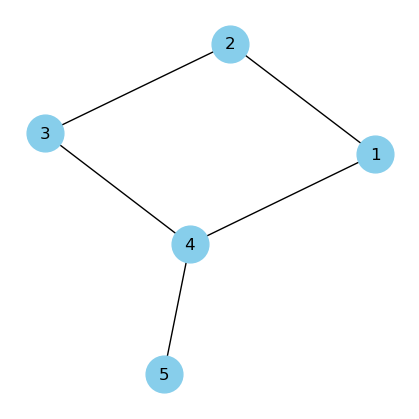

Es decir, la cota del indice de randic es: 4.787693700234704
--------------------------------------------------
El mayor indice de randic es: 2.414213562373095
Se alcanza con el grafo


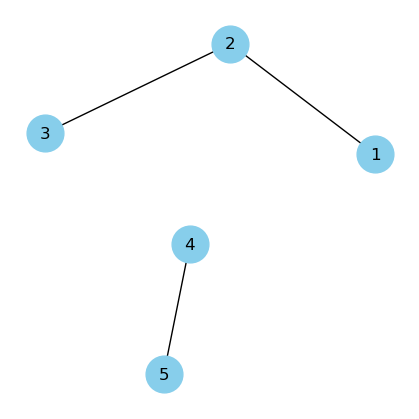

Es decir, la cota del indice de randic es: 4.82842712474619
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Optimizar los pesos
Valor de la cota con los pesos optimos: 4.89897949

Pesos optimos:
[[ 0.     0.848  0.     0.152 -0.   ]
 [ 0.566 -0.     0.434 -0.     0.   ]
 [-0.     0.652  0.     0.348 -0.   ]
 [ 0.101 -0.     0.232  0.     0.667]
 [ 0.     0.    -0.     1.    -0.   ]]



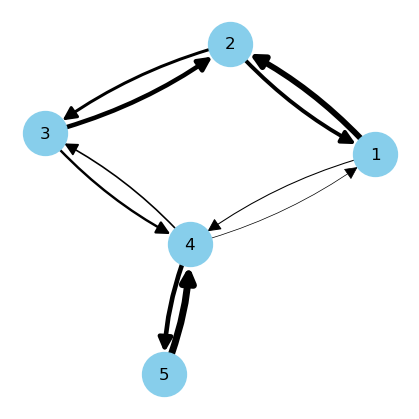

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Resumen:
Mayor indice de randic: 4.82842712474619
Cota optimizada: 4.89897949
 
Redondeado
Mayor indice de randic: 4.82843
Cota optimizada: 4.89898
 
Los mejores pesos no son con randic
 
La energia del grafo es: 5.5959


In [3]:
# Create a new graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (2, 3), (1, 4)])


analisis_pesos_cota(G, repeticiones = 10, ver_desarrollo=0, devolver = 0)

El grafo original tiene indice de randic: 5.773502691896259


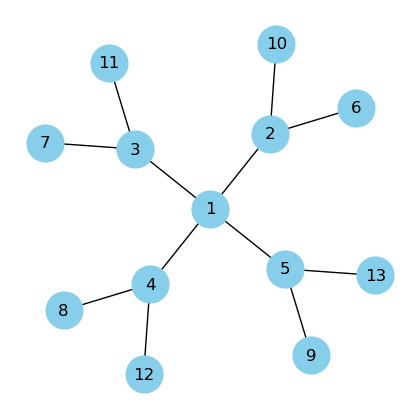

Es decir, la cota del indice de randic es: 11.547005383792518
--------------------------------------------------
El mayor indice de randic es: 5.974691494688162
Se alcanza con el grafo


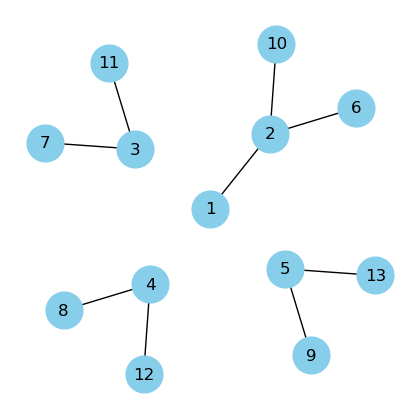

Es decir, la cota del indice de randic es: 11.949382989376325
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Optimizar los pesos


C:\Users\diego\anaconda3\envs\sfu\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Valor de la cota con los pesos optimos: 12.0

Pesos optimos:
[[-0.     0.25   0.25   0.25   0.25  -0.    -0.    -0.     0.     0.
  -0.     0.     0.   ]
 [ 0.111 -0.    -0.    -0.     0.     0.444 -0.    -0.     0.     0.444
  -0.     0.    -0.   ]
 [ 0.111  0.     0.     0.     0.    -0.     0.444 -0.     0.    -0.
   0.444 -0.     0.   ]
 [ 0.111 -0.     0.     0.    -0.     0.    -0.     0.444 -0.    -0.
  -0.     0.444 -0.   ]
 [ 0.111  0.     0.    -0.     0.    -0.    -0.    -0.     0.444 -0.
  -0.    -0.     0.444]
 [ 0.     1.    -0.     0.    -0.    -0.     0.     0.     0.     0.
   0.     0.     0.   ]
 [-0.     0.     1.     0.    -0.     0.     0.     0.    -0.     0.
   0.     0.     0.   ]
 [ 0.    -0.     0.     1.    -0.     0.    -0.    -0.    -0.    -0.
   0.     0.     0.   ]
 [-0.    -0.    -0.     0.     1.     0.     0.     0.    -0.     0.
   0.     0.     0.   ]
 [ 0.     1.    -0.    -0.    -0.     0.     0.     0.     0.     0.
   0.     0.    -0.   ]
 [ 0. 

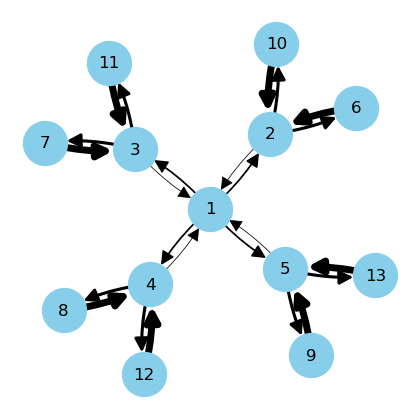

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Resumen:
Mayor indice de randic: 11.949382989376325
Cota optimizada: 12.0
 
Redondeado
Mayor indice de randic: 11.94938
Cota optimizada: 12.0
 
Los mejores pesos no son con randic
 
La energia del grafo es: 13.3843


In [4]:
# Create a new graph
G = create_dandelion_graph(4)

analisis_pesos_cota(G, repeticiones = 20, ver_desarrollo=0, devolver = 0)

## Ver cuando se cumple la cota

In [5]:
# tomar la lista de todos los grafos
lista_grafos_completa = nx.graph_atlas_g()


# filtrar grafos
lista_grafos = []


# iterar en los grafos, quitar los que no se quieran
for grafo in lista_grafos_completa[1:]:
    
    # quitar los grafos con vertices aislados
    if any(deg == 0 for node, deg in grafo.degree()):
        # pasar, el grafo no cumple
        continue        
    
    # quitar grafos disconexos
    if nx.number_connected_components(grafo) > 1:
        # pasar, el grafo no cumple
        continue 
        
    # si no hay problemas, se mete
    lista_grafos.append(grafo)

print(f"Se tienen {len(lista_grafos)} grafos")

Se tienen 995 grafos


In [6]:
# ver para que datos se cumple
# guardar en una lista de dict
# con llaves: grafo, energia, cota_optimizada, cota_randic
grafos_cota_justa = []

# iterar en los nodos de la lista
for idx_grafo, grafo in enumerate(lista_grafos):
    
    # ver el progreso
    print(f"Progreso: [{idx_grafo}/{len(lista_grafos)}]")
    
    # obtener las cotas y energia
    cota_randic, cota_optimizada, energia = analisis_pesos_cota(grafo, repeticiones = 20, ver_desarrollo=-1, devolver = 1)
    
    
    
    # ver cual es la mejor cota
    mejor_cota = max(cota_randic, cota_optimizada)
    
    # ver si es alcanzada por la energia
    if np.isclose(mejor_cota, energia):
        # guardar el grafo
        grafos_cota_justa.append({'grafo':grafo, 
                                  'energia':energia, 
                                  'cota_optimizada':cota_optimizada,
                                  'cota_randic': cota_randic})
        # decir que se alcanzo
        print(f"\tSe alcanza la cota para este grafo. Hasta ahora van {len(grafos_cota_justa)}")
        

# ver que porcentaje son justos
print("")
print(f"De los {len(lista_grafos)} grafos analizados")
print(f"Se cumple la cota para {len(grafos_cota_justa)}")
print(f"Esto es un {(len(grafos_cota_justa)/len(lista_grafos)):.2f}")

Progreso: [0/995]
	Se alcanza la cota para este grafo. Hasta ahora van 1
Progreso: [1/995]
	Se alcanza la cota para este grafo. Hasta ahora van 2
Progreso: [2/995]
Progreso: [3/995]
	Se alcanza la cota para este grafo. Hasta ahora van 3
Progreso: [4/995]
Progreso: [5/995]
Progreso: [6/995]
	Se alcanza la cota para este grafo. Hasta ahora van 4
Progreso: [7/995]
Progreso: [8/995]
Progreso: [9/995]
	Se alcanza la cota para este grafo. Hasta ahora van 5
Progreso: [10/995]
Progreso: [11/995]
Progreso: [12/995]
Progreso: [13/995]
Progreso: [14/995]
Progreso: [15/995]
Progreso: [16/995]
Progreso: [17/995]
Progreso: [18/995]
Progreso: [19/995]
Progreso: [20/995]
Progreso: [21/995]
	Se alcanza la cota para este grafo. Hasta ahora van 6
Progreso: [22/995]
Progreso: [23/995]
Progreso: [24/995]
Progreso: [25/995]
Progreso: [26/995]
Progreso: [27/995]
Progreso: [28/995]
Progreso: [29/995]
Progreso: [30/995]
	Se alcanza la cota para este grafo. Hasta ahora van 7
Progreso: [31/995]
Progreso: [32/995

Progreso: [388/995]
Progreso: [389/995]
Progreso: [390/995]
Progreso: [391/995]
Progreso: [392/995]
Progreso: [393/995]
Progreso: [394/995]
Progreso: [395/995]
Progreso: [396/995]
Progreso: [397/995]
Progreso: [398/995]
Progreso: [399/995]
Progreso: [400/995]
Progreso: [401/995]
Progreso: [402/995]
Progreso: [403/995]
Progreso: [404/995]
Progreso: [405/995]
Progreso: [406/995]
Progreso: [407/995]
Progreso: [408/995]
Progreso: [409/995]
Progreso: [410/995]
Progreso: [411/995]
Progreso: [412/995]
Progreso: [413/995]
Progreso: [414/995]
Progreso: [415/995]
Progreso: [416/995]
Progreso: [417/995]
Progreso: [418/995]
Progreso: [419/995]
Progreso: [420/995]
Progreso: [421/995]
Progreso: [422/995]
Progreso: [423/995]
Progreso: [424/995]
Progreso: [425/995]
Progreso: [426/995]
Progreso: [427/995]
Progreso: [428/995]
Progreso: [429/995]
Progreso: [430/995]
Progreso: [431/995]
	Se alcanza la cota para este grafo. Hasta ahora van 11
Progreso: [432/995]
Progreso: [433/995]
Progreso: [434/995]
Prog

Progreso: [793/995]
Progreso: [794/995]
Progreso: [795/995]
Progreso: [796/995]
Progreso: [797/995]
Progreso: [798/995]
Progreso: [799/995]
Progreso: [800/995]
Progreso: [801/995]
Progreso: [802/995]
Progreso: [803/995]
Progreso: [804/995]
Progreso: [805/995]
Progreso: [806/995]
Progreso: [807/995]
Progreso: [808/995]
Progreso: [809/995]
Progreso: [810/995]
Progreso: [811/995]
Progreso: [812/995]
Progreso: [813/995]
Progreso: [814/995]
Progreso: [815/995]
Progreso: [816/995]
Progreso: [817/995]
Progreso: [818/995]
Progreso: [819/995]
Progreso: [820/995]
Progreso: [821/995]
Progreso: [822/995]
Progreso: [823/995]
Progreso: [824/995]
Progreso: [825/995]
Progreso: [826/995]
Progreso: [827/995]
Progreso: [828/995]
Progreso: [829/995]
Progreso: [830/995]
Progreso: [831/995]
Progreso: [832/995]
Progreso: [833/995]
Progreso: [834/995]
Progreso: [835/995]
Progreso: [836/995]
Progreso: [837/995]
Progreso: [838/995]
Progreso: [839/995]
Progreso: [840/995]
Progreso: [841/995]
Progreso: [842/995]


In [19]:
# ver para cuantos la energia es dos veces el randic
num_grafos_cumplen_randic = 0

# iterar en los grafos donde se alcanza la cota
for grafo_dict in grafos_cota_justa:
    
    # sacar la energia
    energia_grafo = grafo_dict['energia']
    
    # sacar el grafo
    grafo =  grafo_dict['grafo']
    
    # ver si es dos veces el randic
    if np.isclose(energia_grafo, 2*get_randic(grafo)):
        num_grafos_cumplen_randic += 1
        
        
# ver el porcentaje de los que cumplen
porcentaje_grafos_con_randic = num_grafos_cumplen_randic/len(grafos_cota_justa)

# imrpimir
print(f"De los {len(grafos_cota_justa)} grafos que la energia alcanza la cota")
print(f"La energia es dos veces el randic para {num_grafos_cumplen_randic}")
print(f"Esto es un {100*(num_grafos_cumplen_randic/len(grafos_cota_justa)):.2f}%")

De los 12 grafos que la energia alcanza la cota
La energia es dos veces el randic para 12
Esto es un 100.00%


[(0, 1)]


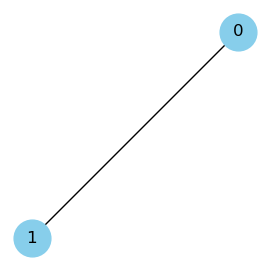

Energia: 2.0

Indice randic por dos: 2.0
Mejor cota randic subgrafos: 2.0
Mejor cota en general: 2.0
----------------------------------------------------------------------------------------------------
[(0, 1), (0, 2)]


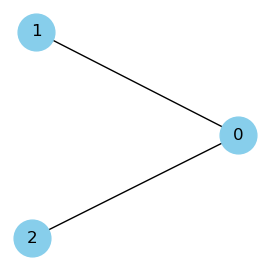

Energia: 2.8284271247461903

Indice randic por dos: 2.82842712474619
Mejor cota randic subgrafos: 2.82842712474619
Mejor cota en general: 2.82842712
----------------------------------------------------------------------------------------------------
[(0, 3), (1, 3), (2, 3)]


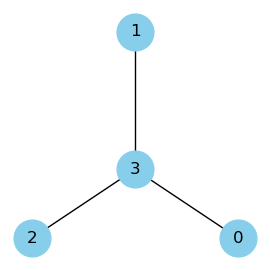

Energia: 3.4641016151377544

Indice randic por dos: 3.4641016151377553
Mejor cota randic subgrafos: 3.4641016151377553
Mejor cota en general: 3.46410162
----------------------------------------------------------------------------------------------------
[(0, 1), (0, 3), (1, 2), (2, 3)]


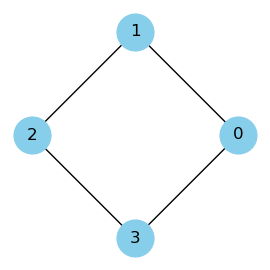

Energia: 4.0

Indice randic por dos: 4.0
Mejor cota randic subgrafos: 4.0
Mejor cota en general: 4.0
----------------------------------------------------------------------------------------------------
[(0, 4), (1, 4), (2, 4), (3, 4)]


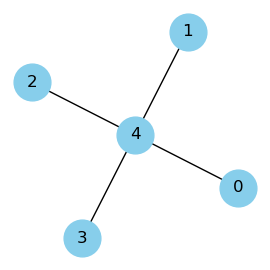

Energia: 3.9999999999999996

Indice randic por dos: 4.0
Mejor cota randic subgrafos: 4.0
Mejor cota en general: 4.0
----------------------------------------------------------------------------------------------------
[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]


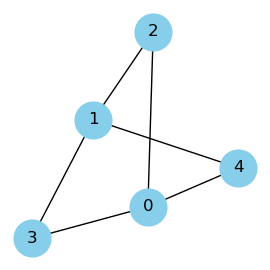

Energia: 4.8989794855663575

Indice randic por dos: 4.898979485566357
Mejor cota randic subgrafos: 4.898979485566357
Mejor cota en general: 4.89897949
----------------------------------------------------------------------------------------------------
[(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]


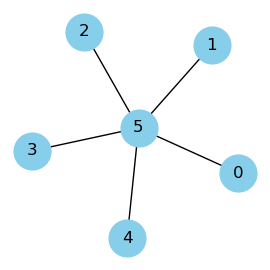

Energia: 4.47213595499958

Indice randic por dos: 4.47213595499958
Mejor cota randic subgrafos: 4.47213595499958
Mejor cota en general: 4.47213595
----------------------------------------------------------------------------------------------------
[(0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)]


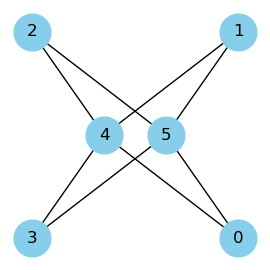

Energia: 5.656854249492378

Indice randic por dos: 5.65685424949238
Mejor cota randic subgrafos: 5.65685424949238
Mejor cota en general: 5.65685425
----------------------------------------------------------------------------------------------------
[(0, 1), (0, 3), (0, 5), (1, 2), (1, 4), (2, 3), (2, 5), (3, 4), (4, 5)]


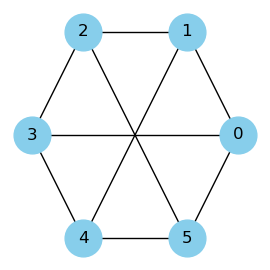

Energia: 6.0

Indice randic por dos: 6.0
Mejor cota randic subgrafos: 6.0
Mejor cota en general: 6.0
----------------------------------------------------------------------------------------------------
[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6)]


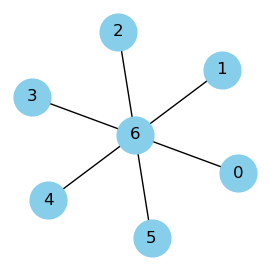

Energia: 4.898979485566356

Indice randic por dos: 4.898979485566357
Mejor cota randic subgrafos: 4.898979485566357
Mejor cota en general: 4.89897949
----------------------------------------------------------------------------------------------------
[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]


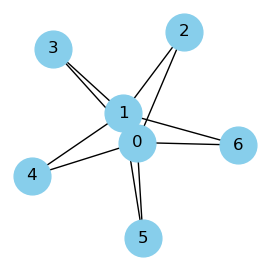

Energia: 6.32455532033676

Indice randic por dos: 6.324555320336759
Mejor cota randic subgrafos: 6.324555320336759
Mejor cota en general: 6.32455532
----------------------------------------------------------------------------------------------------
[(0, 1), (0, 2), (0, 4), (0, 5), (1, 3), (1, 6), (2, 3), (2, 6), (3, 4), (3, 5), (4, 6), (5, 6)]


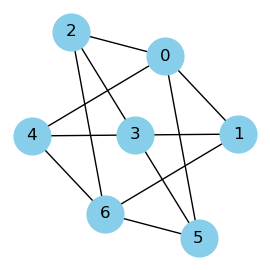

Energia: 6.9282032302755105

Indice randic por dos: 6.928203230275511
Mejor cota randic subgrafos: 6.928203230275511
Mejor cota en general: 6.92820323
----------------------------------------------------------------------------------------------------


In [20]:
# dibujar los grafos para los que se alanca

for grafo_dict in grafos_cota_justa:
    
    # sacar el grafo
    grafo = grafo_dict['grafo']
    
    # imprimir aristas
    print(grafo.edges)
    
    dibujar_grafo(grafo, (2.5, 2.5))
    
    # imprimir cosas
    print(f"Energia: {grafo_dict['energia']}\n")
    print(f"Indice randic por dos: {2*get_randic(grafo)}")
    print(f"Mejor cota randic subgrafos: {grafo_dict['cota_randic']}")
    print(f"Mejor cota en general: {grafo_dict['cota_optimizada']}")
    
    
    print("-"*100)